In [ ]:
Roll no:108806
Name: Rohith R
course name:DA
batch:geetika mam batch (9:30 to 11:30)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To read the dataset
df=pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


## Data cleaning and preparation

In [7]:
# To get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [9]:
# To find the null values in dataset 
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [13]:
# To find the mean values for each column
print(df['LB'].mean())
print(df['AC'].mean())
print(df['DS'].mean())
print(df['DP'].mean())
print(df['MLTV'].mean())
print(df['Width'].mean())
print(df['Tendency'].mean())
print(df['NSP'].mean())

133.3435983550352
0.0032189782438000465
2.5089835057102827e-06
0.00017515121174634704
8.28488742706321
70.42926049411918
0.3163714038702473
1.304507175110962


In [17]:
# fill the null places with mean values of each column
df.fillna({'LB':df['LB'].mean()},inplace=True)
df.fillna({'DS':df['DS'].mean()}, inplace=True)
df.fillna({"AC":df['AC'].mean()}, inplace=True)
df.fillna({'DP':df['DP'].mean()}, inplace=True)
df.fillna({'MLTV':df["MLTV"].mean()}, inplace=True)          #   fill the null values using of mean permently fill the 
df.fillna({'Width':df['Width'].mean()}, inplace=True)
df.fillna({'Tendency':df['Tendency'].mean()}, inplace=True)
df.fillna({'NSP':df['NSP'].mean()}, inplace = True)

In [19]:
# again check for null values
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [21]:
from scipy import stats
# To identify the outliers using z_score
z_scores=np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers_z=(z_scores>3)
#show rows with outliers based zscore
outliers_z_df = df[outliers_z.any(axis=1)]
print(outliers_z_df)

         LB        AC        FM        UC        DL            DS        DP  \
5     134.0  0.001116  0.000000  0.010493  0.009444  0.000000e+00  0.002099   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.000000e+00  0.002805   
8     122.0  0.038567  0.000000  0.001517  0.000000  0.000000e+00  0.000000   
13    131.0  0.009077  0.222390  0.006051  0.001513  0.000000e+00  0.000000   
14    130.0  0.005838  0.407840  0.004170  0.005004  0.000000e+00  0.000826   
...     ...       ...       ...       ...       ...           ...       ...   
2033  129.0  0.000000  0.001122  0.006734  0.005767  4.249675e-06  0.002245   
2060  127.0  0.038567  0.000000  0.005663  0.000000  0.000000e+00  0.000000   
2075  130.0  0.007011  0.000876  0.000876  0.000000 -1.353180e-03  0.000000   
2088  133.0  0.000000  0.001236  0.006180  0.000000 -8.720000e-07  0.000000   
2121  140.0  0.000000  0.961268  0.007426  0.000000  0.000000e+00  0.000000   

           ASTV      MSTV  ALTV  MLTV  Width  Tende

- We calculate the Z-scores for each numeric column in the dataset.
- Z_scores > 3 :If any Z-score exceeds 3 we mark it as an outlier.
- axis = 1 : it's finding the outliers row vice
- finaly we got a outliers


## Statistical Summary

In [25]:
# To find central tendencies like mean,median,mode
df.mean()

LB          133.343598
AC            0.003219
FM            0.009894
UC            0.004391
DL            0.001895
DS            0.000003
DP            0.000175
ASTV         46.995984
MSTV          1.364378
ALTV         10.285964
MLTV          8.284887
Width        70.429260
Tendency      0.316371
NSP           1.304507
dtype: float64

In [27]:
df.median()

LB          133.000000
AC            0.001668
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        68.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [29]:
df.mode()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.5,0.0,0.0,39.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN


In [31]:
# To find the dispersion like standard deviation,interquartile range
df.std()

LB          11.214328
AC           0.004370
FM           0.067540
UC           0.003340
DL           0.003343
DS           0.000141
DP           0.000836
ASTV        18.813973
MSTV         1.173632
ALTV        21.205041
MLTV         7.734356
Width       42.719161
Tendency     0.642424
NSP          0.641426
dtype: float64

In [35]:
# Inter quantile range
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1 # interquantile range
print(IQR)

LB          14.000000
AC           0.005606
FM           0.002567
UC           0.004685
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


## Highlights of summary

- **LB (Label):** The mean (133.34) and median (133.00) are very close, indicating a symmetric distribution around 133 for this column, The standard deviation (11.27) and IQR (14.00) are quite similar
---
- **ALTV :** The mean (10.29) is significantly higher than the median (0.00), which also suggests a skewed distribution with many zero values and a few larger ones.The standard deviation (21.21) is much larger than the IQR (11.00), indicating that the data is more dispersed and might have more outliers.
---
- **DL, DS, DP:** These columns contain a lot of zeros, as seen in their medians (0.00) and the range between the mean and median.
---
- **ASTV :** The mean (46.995984) is higher than the median (49.000000), skewed distribution where most values are near 0 , negative skewd (mode > median > mean)
---
- **MST :** The IQR is 1.00, and the standard deviation is 1.17, which indicates moderate variability and spread in this feature.
---
- **Width :** The mean (70.429260) is substantially higher than the median (68.000000), and the IQR (63.000000) is close to the standard deviation (42.719161), suggesting this feature might have some large outliers.
---
- These findings indicate variability, outliers, and certain columns with skewed distributions, which can be useful for further data analysis,

## Data visualization

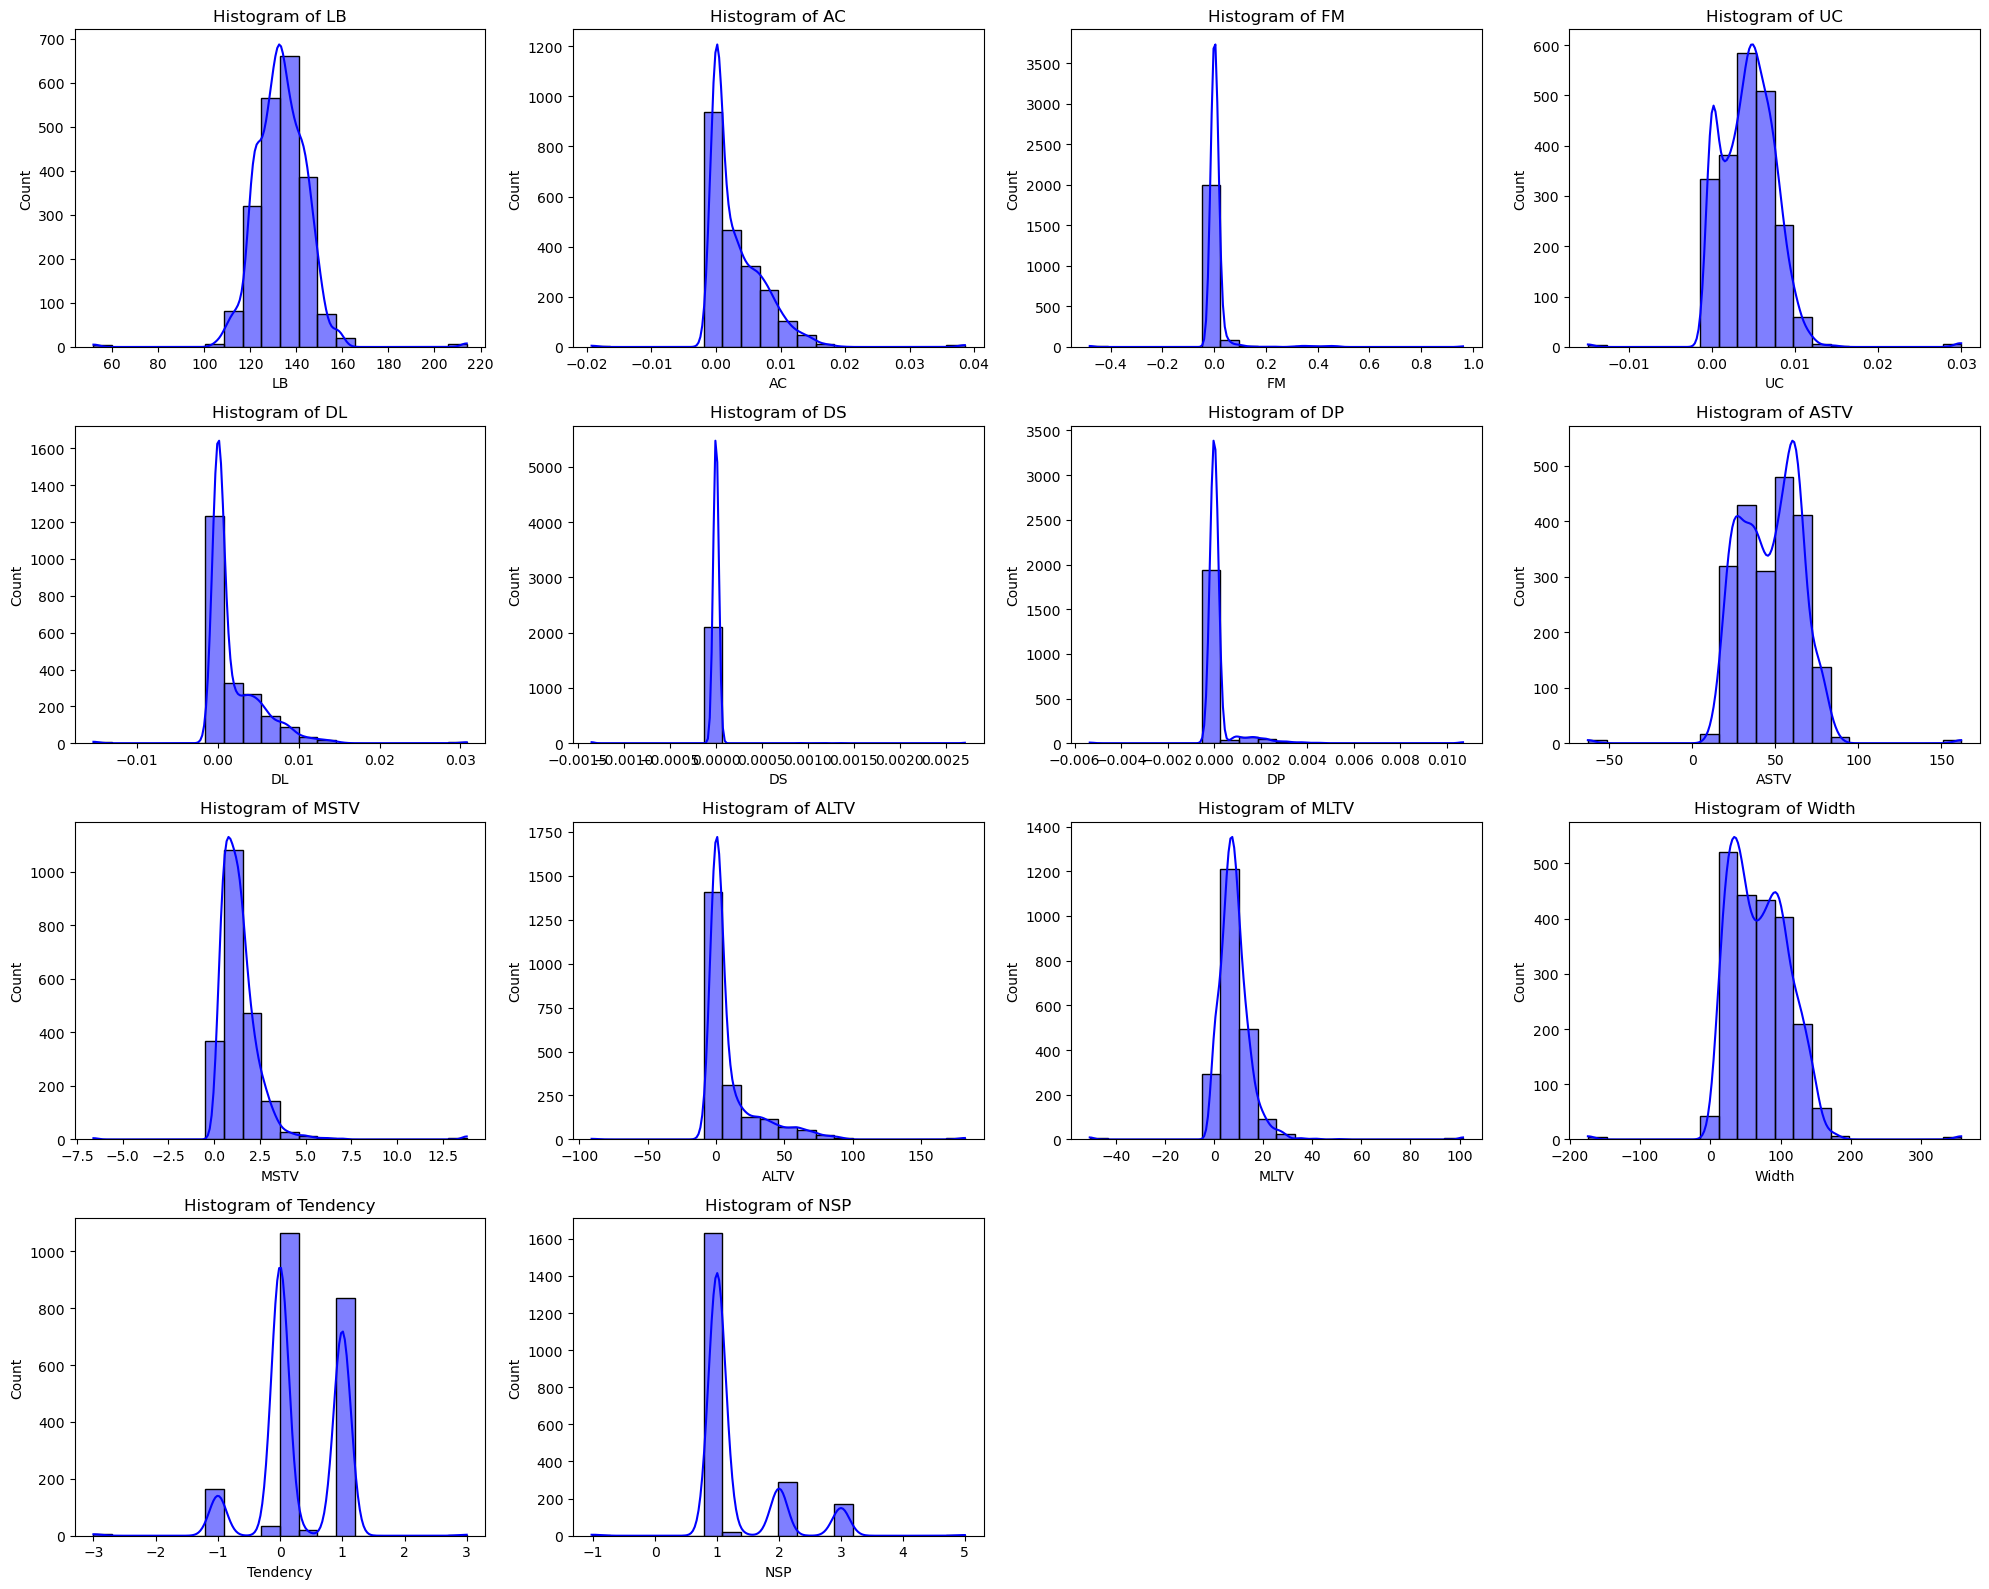

In [66]:
### Histogram
import math
numeric_cols = df.select_dtypes(include=[np.number]).columns # filtering all numerical columns
n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))# To set figure size
for i, column in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[column], kde=True, bins=20, color='b', edgecolor='black') # To define the histplot
    plt.title(f'Histogram of {column}')
plt.tight_layout() # To form a clean layout
plt.show()

- Each histogram shows the distribution of values for the respective column, with Kernel Density Estimation (KDE) overlaid to visualize the smooth distribution.
- The histograms are color-coded in blue, with black edges around the bars for better clarity.
- Titles for each subplot reflect the column names from the DataFrame, making it clear which column’s distribution is being visualized.

## Barplots

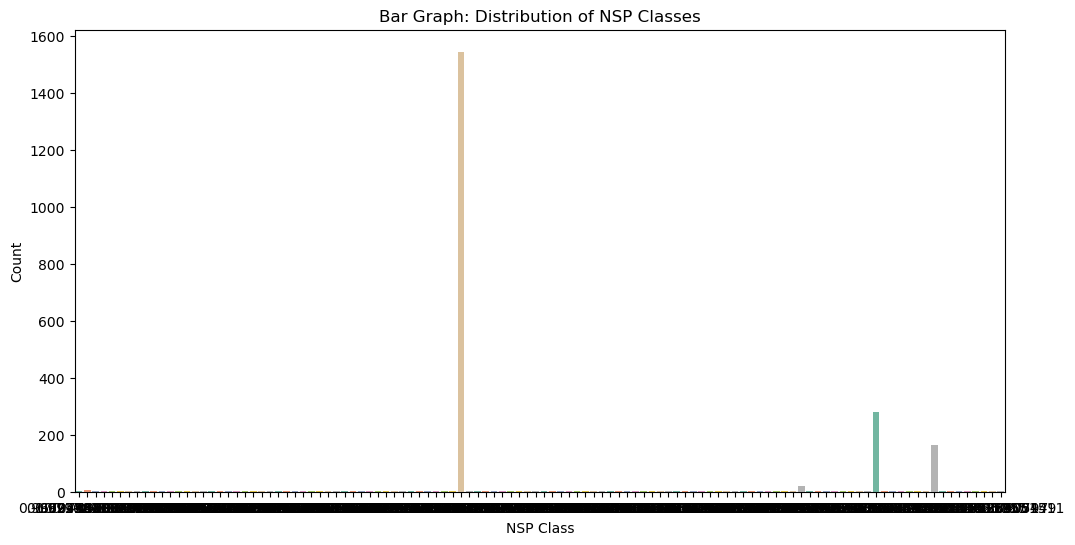

In [86]:
plt.figure(figsize=(12,6))         #  size of the bar chart
sns.countplot(x='NSP', data=df, palette='Set2')        #   creat a bar chart usig of categorical data (NSP)
plt.title('Bar Graph: Distribution of NSP Classes')    # title of the bar chart
plt.xlabel('NSP Class')    # x_label on the Graph
plt.xticks(None)
plt.ylabel('Count')        #   Y_label on the Graph
plt.show()

- A count plot is particularly useful when dealing with categorical data. It shows the number of data points that fall into each category or class. In this case, the plot will help you understand how many observations belong to each class in the NSP column.
- The bar heights represent the count of observations in each category of the NSP class.
- Taller bars correspond to more frequent categories in the NSP variable, while shorter bars correspond to less frequent categories.

## Co-relation heatmap

In [94]:
corr=df.corr()
corr

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062839,0.018776,-0.166201,-0.126536,-0.005438,-0.047724,0.241857,-0.169561,0.210446,-0.003457,-0.118425,0.236864,0.131843
AC,-0.062839,1.000000,0.009432,0.071863,-0.093196,-0.033101,-0.083277,-0.230439,0.133649,-0.271041,-0.104875,0.234735,0.031977,-0.312022
FM,0.018776,0.009432,1.000000,-0.053226,0.009718,0.029899,0.121274,-0.032691,0.017055,-0.011936,-0.006237,0.097204,-0.018338,0.074048
UC,-0.166201,0.071863,-0.053226,1.000000,0.190128,-0.006922,0.070501,-0.181161,0.189406,-0.227304,-0.049351,0.107159,-0.066463,-0.185001
DL,-0.126536,-0.093196,0.009718,0.190128,1.000000,0.058430,0.144940,-0.069361,0.410102,-0.186967,-0.165198,0.408664,-0.023490,0.025342
DS,-0.005438,-0.033101,0.029899,-0.006922,0.058430,1.000000,0.004285,0.008425,0.016077,-0.004392,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.083277,0.121274,0.070501,0.144940,0.004285,1.000000,0.038117,0.119250,-0.077654,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.241857,-0.230439,-0.032691,-0.181161,-0.069361,0.008425,0.038117,1.000000,-0.293882,0.357497,-0.219728,-0.206942,-0.010892,0.421313
MSTV,-0.169561,0.133649,0.017055,0.189406,0.410102,0.016077,0.119250,-0.293882,1.000000,-0.291935,0.028779,0.433064,-0.036660,-0.094630
ALTV,0.210446,-0.271041,-0.011936,-0.227304,-0.186967,-0.004392,-0.077654,0.357497,-0.291935,1.000000,-0.107568,-0.345997,0.036722,0.365357


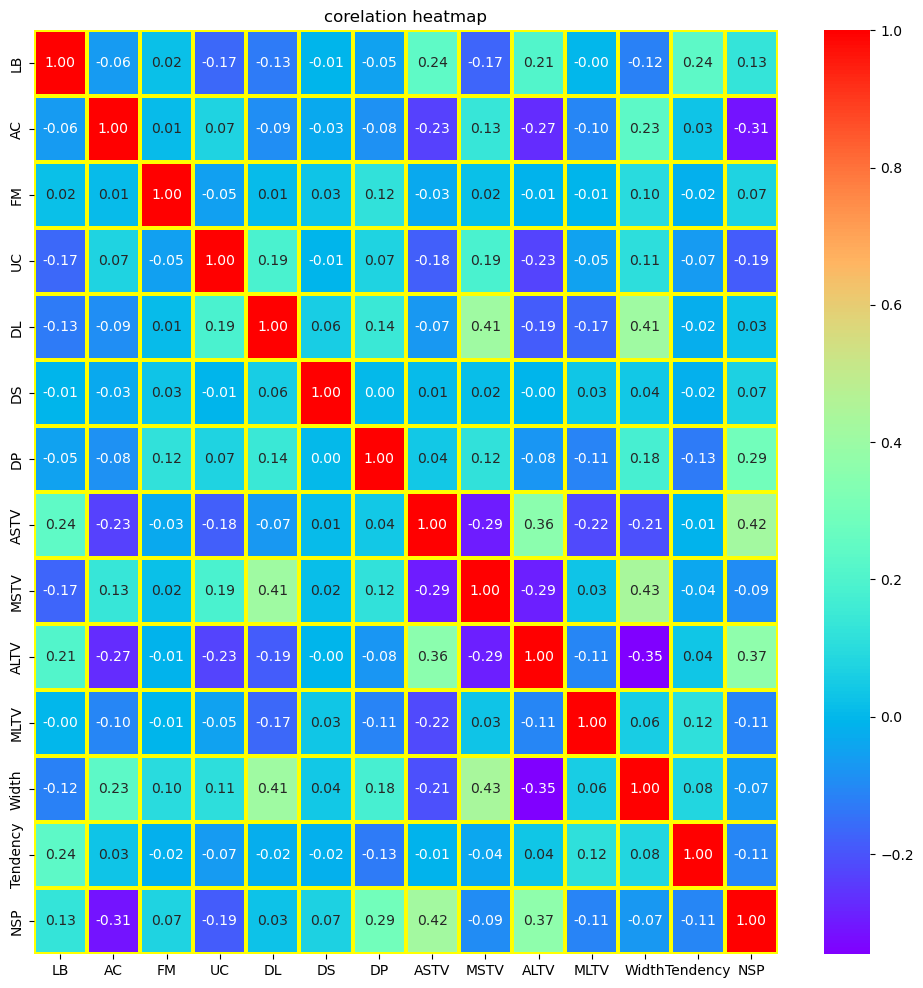

In [102]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,fmt='.2f',linewidth=1.5,linecolor='yellow',cmap='rainbow')
plt.title('corelation heatmap')
plt.show()

- Correlation Heatmap: A heatmap is used to visually represent the correlation matrix between variables in a dataset. The correlation values range from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 meaning no correlation

## Pairplots

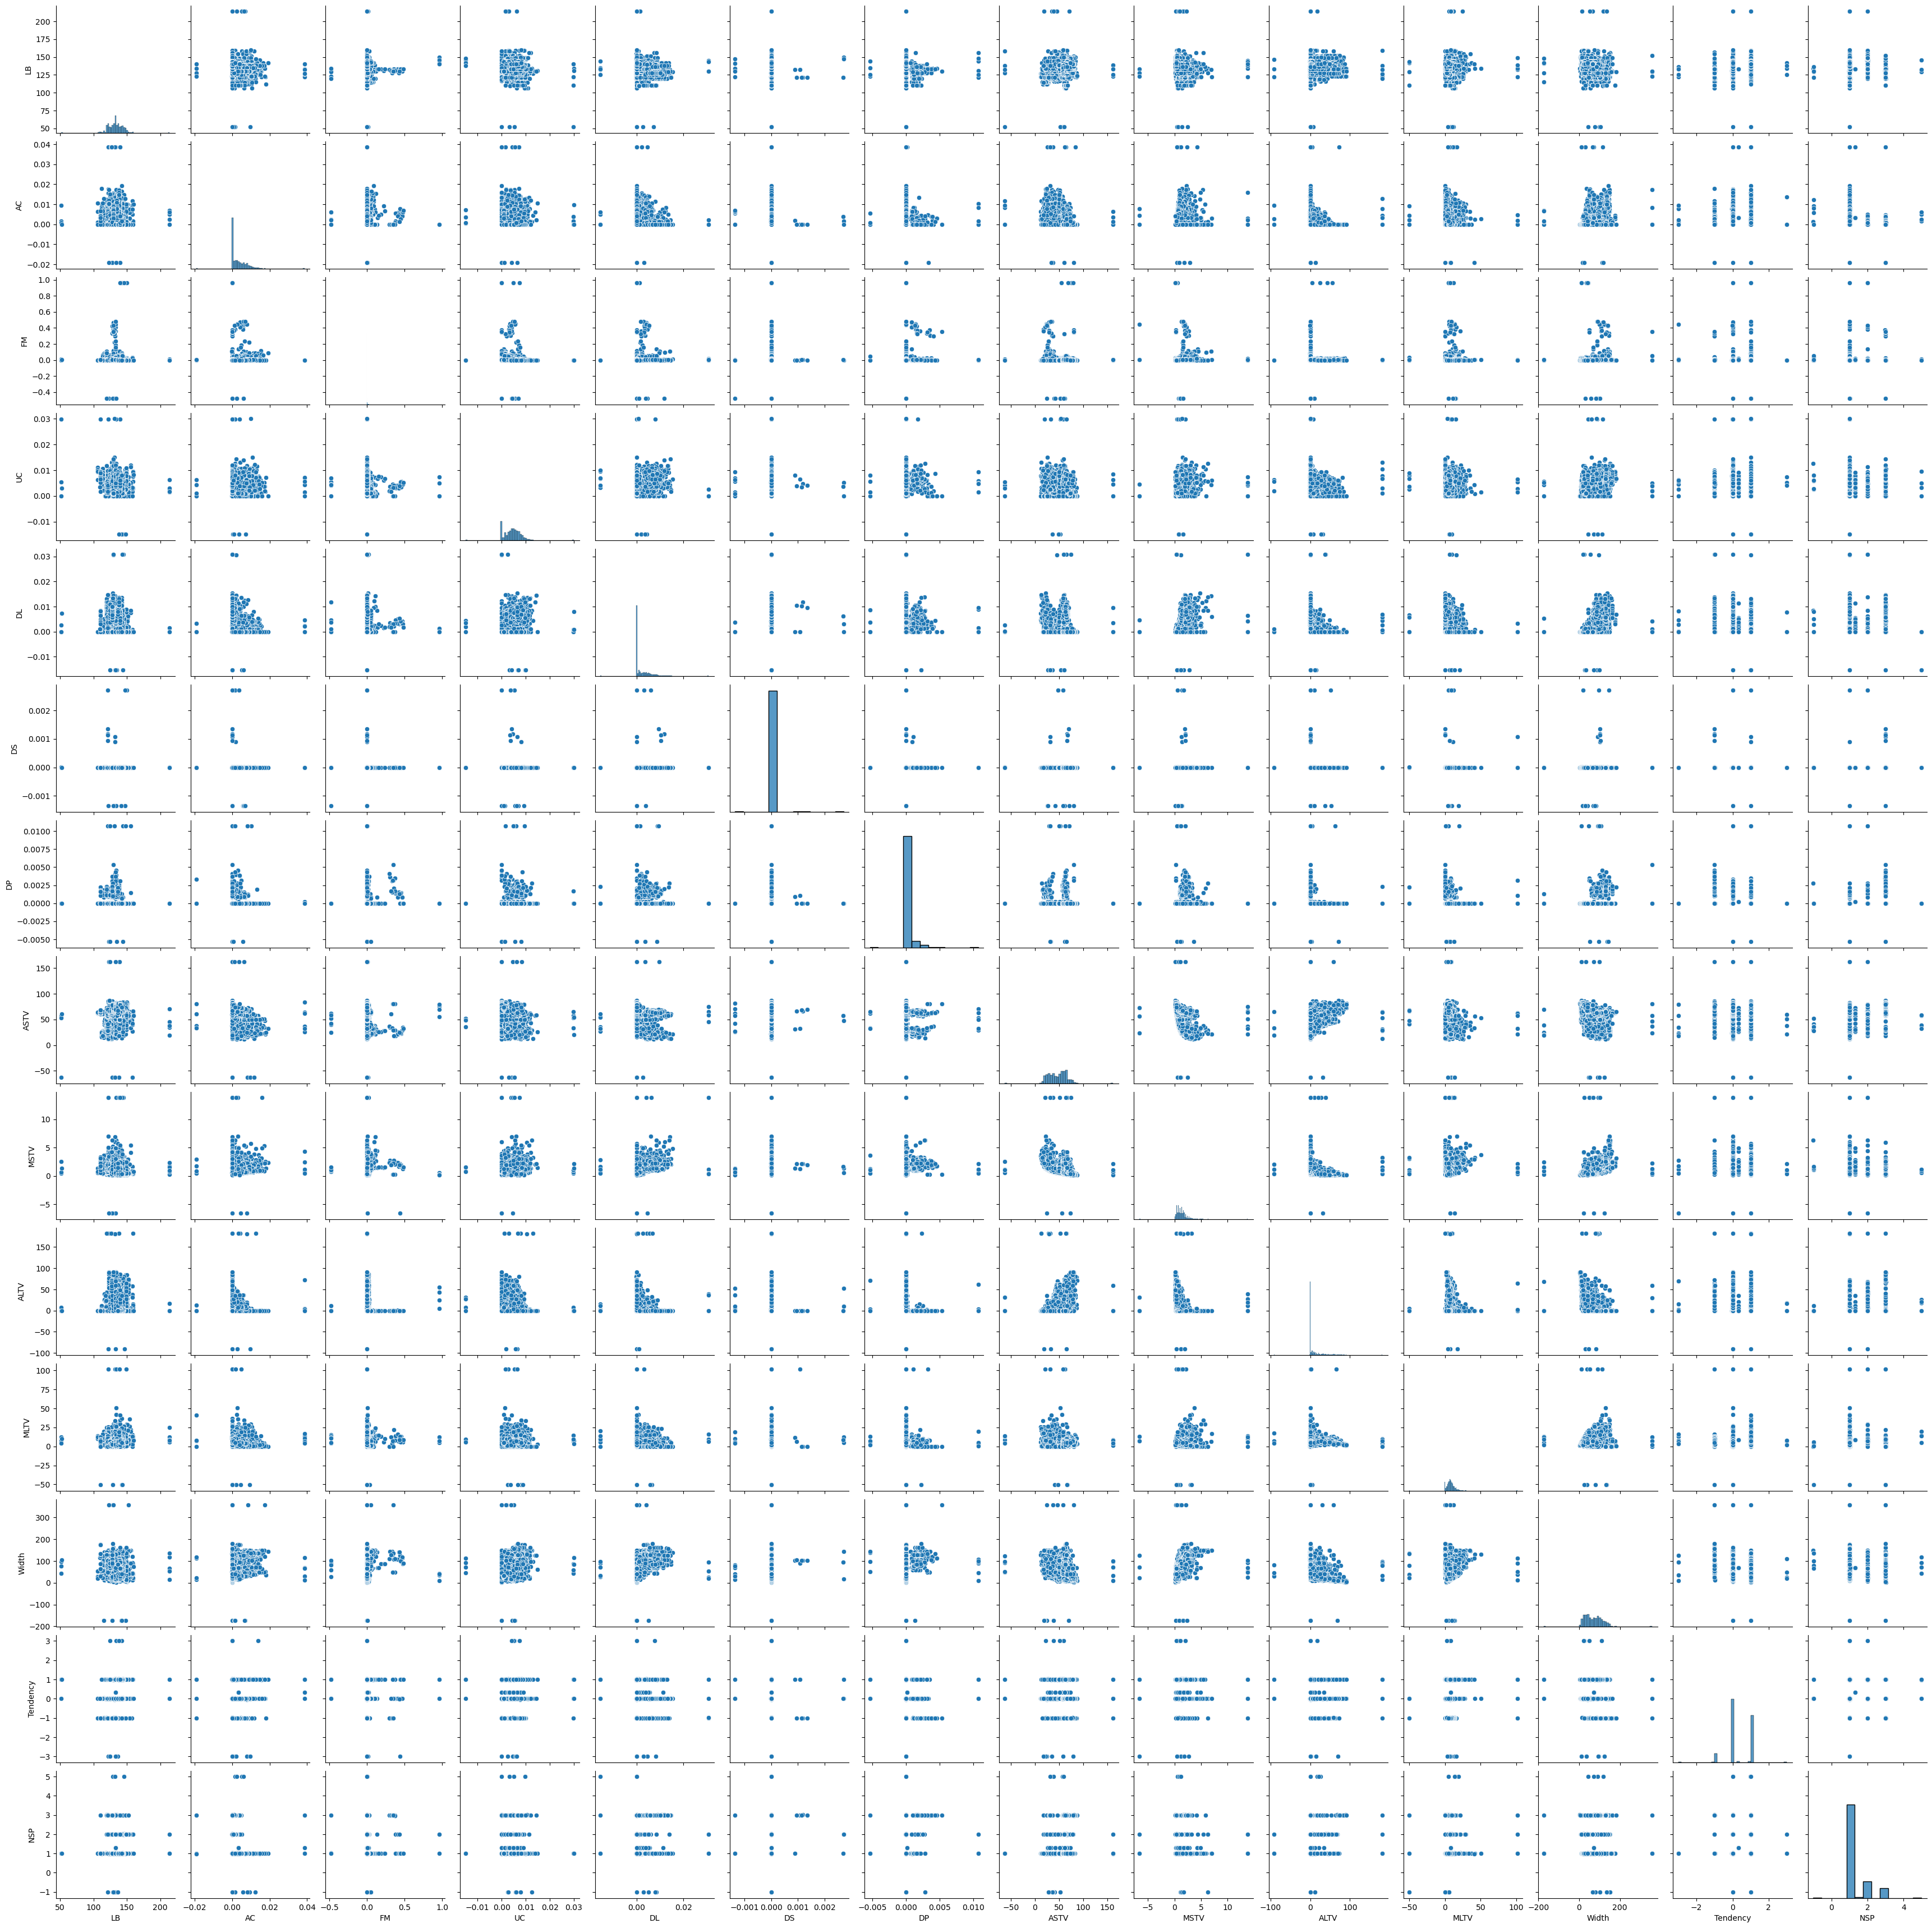

In [106]:
sns.pairplot(df)
plt.show()

- Pair Plots: Reveal correlations or lack thereof, as well as non-linear relationships between features. You can quickly see if two variables are related or if any variables are completely independent

#	Pattern Recognition and Insights:

- A correlation is a statistical measure that describes the extent to which two variables move in relation to each other. A positive correlation means that as one variable increases, the other also tends to increase, and vice versa for a negative correlation

- **Positive Correlation :** If the points form an upward sloping line, this suggests that as one variable increases, the other does too.

- **Negative Correlation:** If the points form a downward sloping line, this indicates an inverse relationship (as one variable increases, the other decreases).

- **No Correlation :** If the points are scattered randomly without any clear direction, this suggests no meaningful relationship between the two variables.

- If two or more features (e.., LB and AC) are highly correlated, it suggests that they may be capturing similar information. If they are predictive of the NSP class, then one of them may be redundant, and it might be beneficial to drop one to simplify your model.

- We can visualize the correlations using a correlation matrix and a pair plot to see how the variables relate to each other.

# Conclusion

### Summarize the key insights and patterns discovered through your exploratory analysis.

- **Feature Scales:** The features like LB, AC, FM, and others appear to have different scales, indicating the need for feature scaling
- **Possible Relationships:** Some columns, like AC, FM, UC, and others, have many zeros, which could indicate either a sparse nature or certain characteristics that are consistently absent
- **Outliers:** A visual inspection of distributions (e.g., histograms) could highlight potential outliers. Variables like ALTV, MLTV, or Width might show a few extreme values that could skew the analysis or predictions.
- **Linear Relationships:** Certain features may be highly correlated with each other, such as Width and LB  suggesting possible multicollinearity.
- **Negative Correlations:** Variables such as Tendency and NSP might exhibit negative correlations, where higher Tendency values correspond to one class, while lower values are associated with another.
- **Tendency and NSP:** The Tendency feature appears to be a key discriminating factor for NSP class, with values near 1.0 corresponding to certain NSP labels and lower values near 0 associated with other classes. This indicates that Tendency might be an important predictive feature for classification tasks
- **Sparse Data Columns:** Some features, such as DS and DP, contain only zeros, which might suggest that these columns could be dropped during preprocessing or treated with domain-specific knowledge
- Columns like FM, UC, and DL exhibit values close to zero or very small values for most of the observations. These features may either have:
- Columns like FM, UC, and DL exhibit values close to zero or very small values for most of the observations. These features may either have:
- ASTV, MSTV, ALTV, and MLTV: These columns have values that vary with smaller ranges. These might represent statistical metrics or features tied to specific measurements. They can be useful in distinguishing certain patterns for classification tasks.

### Discuss how these findings could impact decision-making or further analysis.

- **Impact on Decision-Making:** If there is significant class imbalance in the NSP variable, this could result in biased models that favor the majority class. For instance, a classifier might predict the majority class correctly most of the time but fail on the minority class.
- **Standardization/Normalization:** Normalize or standardize the numerical features so they are on the same scale. For example, using StandardScaler (zero mean, unit variance) or MinMaxScaler  could improve model performance, especially for distance-based algorithms.
- **Transformation:** Log transformations or power transformations (Box-Cox) might help in normalizing skewed distributions and making the data more suitable for modeling.
- **Outlier Handling:** Identify and either remove or transform outliers, Tools like boxplots or z-scores can help in identifying extreme values
- **Categorical Encoding:** Use appropriate encoding methods like one-hot encoding for nominal variables or ordinal encoding for ordered categorical variables.
- **Model Tuning:** Hyperparameter tuning for models, especially when using scaling, can optimize performance further.
